# SPIN 1 - VL 04 -- Symplektische Integratoren

## Harmonische Oszillation

## Symplektische Integratoren - LeapFrog




In [47]:
def leapfrog_step(p,q,f,dt):
    fp = f[0]
    fq = f[1]
    q_half = q + 0.5 * dt * fq(p,q)
    p_new = p + dt * fp(p,q_half)
    q_new = q_half + 0.5 * dt * fq(p_new, q_half)
    return np.array([p_new, q_new])

### Harmonische Oszillation


In [48]:
import math
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def H1(p,q):
    return 0.5 * (p**2 + q**2)

def dH1q(p,q):
    return q

def dH1p(p,q):
    return p

def dpH1(p,q):
    return -dH1q(p,q)

def dqH1(p,q):
    return dH1p(p,q)


In [49]:
N = 200
dt = (2 * math.pi) / N

f = [dpH1,dqH1]
p0 = 0.1
q0 = 0.5
pq = np.empty((N, 2))
pq[0] = np.array([p0, q0])


for n in range(N-1):
    pq[n+1] = leapfrog_step(pq[n][0], pq[n][1], f, dt)



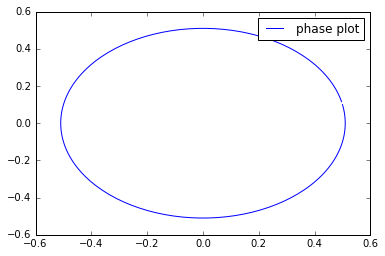

In [50]:
time = np.linspace(0.0, N*dt,N)
p = [x[0] for x in pq]
q = [x[1] for x in pq]

plt.plot(q, p, '-', label = 'phase plot')
plt.legend(loc='upper right')


### Pendel

In [62]:
e = 8

def H2(p,q):
    return 0.5 * p**2 + e * np.cos(q)
def dH2p(p,q):
    return p

def dH2q(p,q,):
    return -e * np.sin(q)

def dpH2(p,q):
    return -dH2q(p,q)

def dqH2(p,q):
    return dH2p(p,q)


In [88]:
N = 100
dt = (2 * math.pi) / N

f = [dpH2,dqH2]
p0 = -.2
q0 = .2
pq = np.empty((N, 2))
pq[0] = np.array([p0, q0])


for n in range(N-1):
    pq[n+1] = leapfrog_step(pq[n][0], pq[n][1], f, dt)



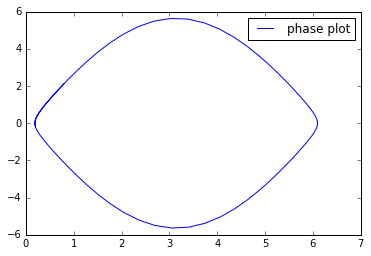

In [89]:
time = np.linspace(0.0, N*dt,N)
p = [x[0] for x in pq]
q = [x[1] for x in pq]

plt.plot(q, p, '-', label = 'phase plot')
plt.legend(loc='upper right')